In [8]:
!pip install scikit-learn pandas matplotlib seaborn


import pandas as pd
df = pd.read_csv("titanic.csv")  # change name if needed
print(df.shape)
df.head()


(891, 8)


,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


In [10]:
use = ['Survived','Pclass','Sex','Age','Fare']
df = df[use].copy()

# Fill NaNs
df['Age'] = df['Age'].fillna(df['Age'].median())

# Encode categoricals
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])         # male/female → 0/1

df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [11]:
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
X_train.shape, X_test.shape


((668, 4), (223, 4))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_s, y_train)

y_pred_log = log_model.predict(X_test_s)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_s, y_train)

y_pred_knn = knn_model.predict(X_test_s)


In [15]:
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test, y_pred_log)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"KNN Accuracy: {acc_knn:.3f}")


Logistic Regression Accuracy: 0.767
KNN Accuracy: 0.803


Logistic Regression
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       137
           1       0.69      0.72      0.70        86

    accuracy                           0.77       223
   macro avg       0.75      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223

KNN
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       137
           1       0.82      0.63      0.71        86

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223



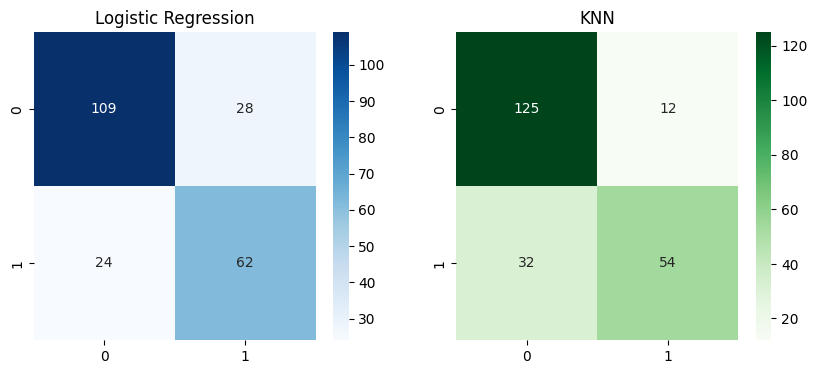

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Logistic Regression\n", classification_report(y_test, y_pred_log))
print("KNN\n", classification_report(y_test, y_pred_knn))

fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='g', cmap='Blues', ax=ax[0])
ax[0].set_title("Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='g', cmap='Greens', ax=ax[1])
ax[1].set_title("KNN")
plt.show()


AUC Logistic: 0.826 | AUC KNN: 0.850


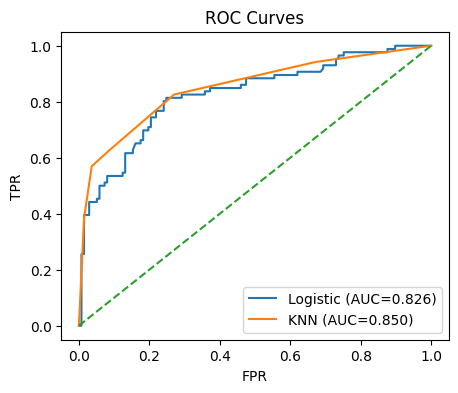

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

# Probabilities
proba_log = log_model.predict_proba(X_test_s)[:,1]
proba_knn = knn_model.predict_proba(X_test_s)[:,1]

auc_log = roc_auc_score(y_test, proba_log)
auc_knn = roc_auc_score(y_test, proba_knn)
print(f"AUC Logistic: {auc_log:.3f} | AUC KNN: {auc_knn:.3f}")

# Curves
fpr_l, tpr_l, _ = roc_curve(y_test, proba_log)
fpr_k, tpr_k, _ = roc_curve(y_test, proba_knn)

plt.figure(figsize=(5,4))
plt.plot(fpr_l, tpr_l, label=f"Logistic (AUC={auc_log:.3f})")
plt.plot(fpr_k, tpr_k, label=f"KNN (AUC={auc_knn:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curves"); plt.legend()
plt.show()


In [18]:
summary = pd.DataFrame({
    'Model': ['Logistic Regression','KNN'],
    'Accuracy': [acc_log, acc_knn],
    'AUC': [auc_log, auc_knn]
})
summary


,Model,Accuracy,AUC
0,Logistic Regression,0.766816,0.825539
1,KNN,0.802691,0.850153
